In [4]:
%matplotlib inline

import numpy as np
import adi
import matplotlib.pyplot as plt
import adi
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import max_len_seq
from scipy import fftpack


In [2]:
# Попробуем отправить просто 1 синусоиду и принять ее же
sample_rate = 1e6 # Hz ширина полосы
center_freq = 2400e6# Hz
num_samps = 10000 # number of samples per call to rx()

sdr = adi.Pluto("ip:192.168.2.1")
sdr.sample_rate = int(sample_rate)

# Config Rx
sdr.rx_lo = int(center_freq)
sdr.rx_buffer_size = num_samps
sdr.gain_control_mode_chan0 = 'manual' #fast_attack, slow_attack
sdr.rx_hardwaregain_chan0 = 70.0 # dB, increase to increase the receive gain, but be careful not to saturate the ADC
sdr.tx_lo = int(center_freq)
sdr.tx_cyclic_buffer = False



barker_cod_7=np.array([1,-1,1,1,1,-1,1], dtype=complex) 

NameError: name 'adi' is not defined

In [44]:
def modulate_qpsk(bit_array_I, bit_array_Q):
    """5.1.3 QPSK modulation
    """
    complex_array = np.array([], dtype = complex)
    
    complex_array.resize( int(len(bit_array_I) ) ) 
    # Modulation
    for i in range(0, len(bit_array_I)):
        real = 1 / np.sqrt(2) * (1 - 2 * bit_array_I[i])
        imag = 1 / np.sqrt(2) * (1 - 2 * bit_array_Q[i])
        complex_array[i] = complex(real, imag)
    return complex_array

## Сформировать данные на передачу

In [45]:
data=max_len_seq(8)[0]
print("Формируем данные на передачу")
print(len(data))
print(data)


# Преобразуем в список Numpy
data = np.concatenate((np.zeros(1), data)) # непонятно зачем, но добавили для четности относительно 2**N
print(np.zeros(1))
print(len(data))
print(data)

# Преобразуем [0, 1, 0, ..., 1] в формат [-1, 1, -1, ..., 1]
# data_plus_minus_one = 2*data-1
# print("Преобразуем [0, 1, 0, ..., 1] в формат [-1, 1, -1, ..., 1]")
# print(data_plus_minus_one)
# ЭТО НЕ НУЖНО, Т.К, 3GPP работает с '0' и '1' значениями бит при маппинге.


# Разделяем биты на подмассивы для IQ
data_IQ_reshaped=np.reshape(data,(2,128))
data_I = data_IQ_reshaped[0,:]
data_Q = data_IQ_reshaped[1,:]
print("Разделяем биты на подмассивы для IQ")
print(data_IQ_reshaped)
print("data_I: ")
print(data_I )
print("data_Q: ")
print(data_Q)

Формируем данные на передачу
255
[1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0]
[0.]
256
[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1

## Modulation mapper (QPSK)

In [46]:
# Маппим битовые потоки в QPSK-значения (или QAM_X)
mapped_data = modulate_qpsk(data_I, data_Q)
print("Маппим битовые потоки в QPSK-значения (или QAM_X)")
print(len(mapped_data))
print(mapped_data)

Маппим битовые потоки в QPSK-значения (или QAM_X)
[ 0.70710678+0.70710678j -0.70710678-0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j -0.70710678-0.70710678j
 -0.70710678-0.70710678j -0.70710678-0.70710678j -0.70710678-0.70710678j
  0.70710678-0.70710678j -0.70710678+0.70710678j -0.70710678-0.70710678j
  0.70710678+0.70710678j -0.70710678-0.70710678j -0.70710678-0.70710678j
  0.70710678+0.70710678j  0.70710678-0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j -0.70710678-0.70710678j -0.70710678+0.70710678j
  0.70710678-0.70710678j  0.70710678+0.70710678j  0.70710678+0.70710678j
 -0.70710678-0.70710678j -0.70710678-0.70710678j  0.70710678-0.70710678j
 -0.70710678-0.70710678j  0.70710678-0.70710678j -0.70710678-0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j  0.70710678+0.70710678j
  0.70710678+0.70710678j -0.70710678+0.70710678j  0.70710678+0.70710678j
  0.70710678+0.70710678j  0.70710678-0.70710678j  0.70710678-0.70710678j
 

Код Баркера + QPSK: 
135
[ 1.        +0.j         -1.        +0.j          1.        +0.j
  1.        +0.j          1.        +0.j         -1.        +0.j
  1.        +0.j          0.70710678+0.70710678j -0.70710678-0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j -0.70710678+0.70710678j
 -0.70710678-0.70710678j -0.70710678-0.70710678j -0.70710678-0.70710678j
 -0.70710678-0.70710678j  0.70710678-0.70710678j -0.70710678+0.70710678j
 -0.70710678-0.70710678j  0.70710678+0.70710678j -0.70710678-0.70710678j
 -0.70710678-0.70710678j  0.70710678+0.70710678j  0.70710678-0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j -0.70710678-0.70710678j
 -0.70710678+0.70710678j  0.70710678-0.70710678j  0.70710678+0.70710678j
  0.70710678+0.70710678j -0.70710678-0.70710678j -0.70710678-0.70710678j
  0.70710678-0.70710678j -0.70710678-0.70710678j  0.70710678-0.70710678j
 -0.70710678-0.70710678j -0.70710678+0.70710678j -0.70710678+0.70710678j
  0.70710678+0.70710678j  0.70710678+0.707

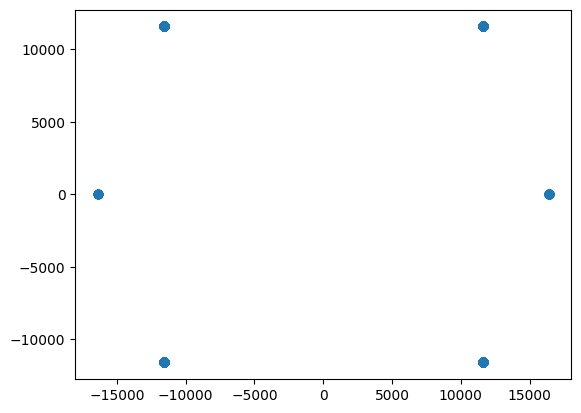

In [55]:
# Добавление кода Баркера 
barker_and_qpsk = np.hstack((barker_cod_7, mapped_data)) 
print("Код Баркера + QPSK: ") 
print(len(barker_and_qpsk))
print(barker_and_qpsk) 
 
# Преобразование битов с данными во временные отсчёты 
barker_and_qpsk_10 = np.repeat(barker_and_qpsk, 10)  
print("Комплексные отсчёты кода Баркера + QPSK на длительности символа: ") 
print(len(barker_and_qpsk_10))
print(barker_and_qpsk_10)

# Добавляем амплитуды
tx_iq = (2**14)*barker_and_qpsk_10
print("Добавляем амплитуды: ") 
print(tx_iq)
plt.figure(1)
plt.scatter(tx_iq.real,tx_iq.imag)


In [57]:
n_frame= len(tx_iq)
sdr.tx(tx_iq)


sdr.rx_destroy_buffer()
sdr.rx_hardwaregain_chan0 = -5
sdr.rx_buffer_size =4*n_frame

rx_iq=sdr.rx()


18000000


In [5]:
def time_sync(samples):
    # Symbol sync, using what we did in sync chapter 
    samples_interpolated = signal.resample_poly(samples, 20, 1) # we'll use 32 as the interpolation factor, arbitrarily chosen, seems to work better than 16 
    sps = 10 
    mu = 0.01 # initial estimate of phase of sample 
    out = np.zeros(len(samples) + 10, dtype=np.complex64) 
    out_rail = np.zeros(len(samples) + 10, dtype=np.complex64) # stores values, each iteration we need the previous 2 values plus current value 
    i_in = 0 # input samples index 
    i_out = 2 # output index (let first two outputs be 0) 
    while i_out < len(samples) and i_in+0 < len(samples): 
        out[i_out] = samples_interpolated[i_in*20 + int(mu*20)] # grab what we think is the "best" sample 
        out_rail[i_out] = int(np.real(out[i_out]) > 0) + 1j*int(np.imag(out[i_out]) > 0) 
        x = (out_rail[i_out] - out_rail[i_out-2]) * np.conj(out[i_out-1]) 
        y = (out[i_out] - out[i_out-2]) * np.conj(out_rail[i_out-1]) 
        mm_val = np.real(y - x) 
        mu += sps + 0.01*mm_val 
        i_in += int(np.floor(mu)) # round down to nearest int since we are using it as an index 
        mu = mu - np.floor(mu) # remove the integer part of mu 
        i_out += 1 # increment output index 
    rx_data = out[2:i_out] # remove the first two, and anything after i_out (that was never filled out) 
    return rx_data
def coarse_freq_sync(samples):
    fs = 1e6
    psd = np.fft.fftshift(np.abs(np.fft.fft(samples)))
    f = np.linspace(-fs/2.0, fs/2.0, len(psd))
    samples = samples**4
    max_freq = f[np.argmax(psd)]
    Ts = 1/fs # calc sample period
    t = np.arange(0, Ts*len(samples), Ts) # create time vector
    out = samples * np.exp(-1j*2*np.pi*max_freq*t/2.0)
    print("coarse out len = ", len(out))
    return out
def fine_freq_sync(samples):
    N = len(samples)
    print("n = ", N)
    fs = 1e6
    phase = 0
    freq = 0
    # These next two params is what to adjust, to make the feedback loop faster or slower (which impacts stability)
    alpha = 3.001
    beta = 0.02
    out = np.zeros(N, dtype=np.complex64)
    freq_log = []
    for i in range(N):
        out[i] = samples[i] * np.exp(-1j*phase) # adjust the input sample by the inverse of the estimated phase offset
        error = np.real(out[i]) * np.imag(out[i]) # This is the error formula for 2nd order Costas Loop (e.g. for BPSK)
        # Advance the loop (recalc phase and freq offset)
        freq += (beta * error)
        freq_log.append(freq * fs / (2*np.pi)) # convert from angular velocity to Hz for logging
        phase += freq + (alpha * error)
        
            # Optional: Adjust phase so its always between 0 and 2pi, recall that phase wraps around every 2pi
        # while phase >= 2*np.pi:
        #     phase -= 2*np.pi
        # while phase < 0:
        #     phase += 2*np.pi
    return out

rx_data length():  400000
raw sdr.rx() data plotted 
coarse out len =  1350
n =  2
2


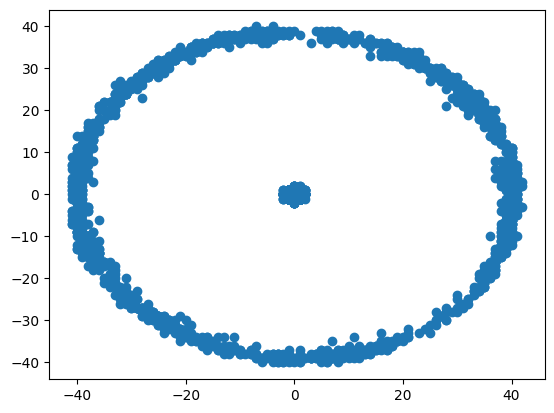

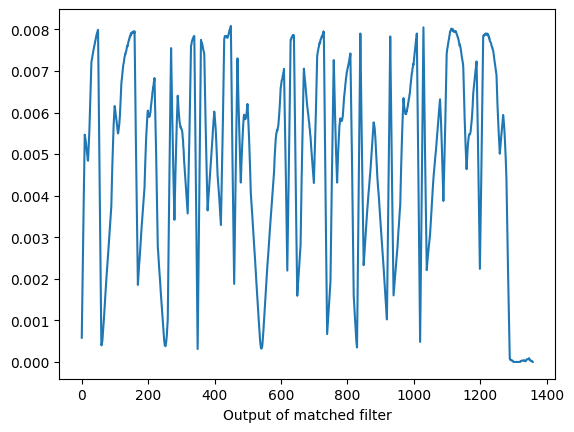

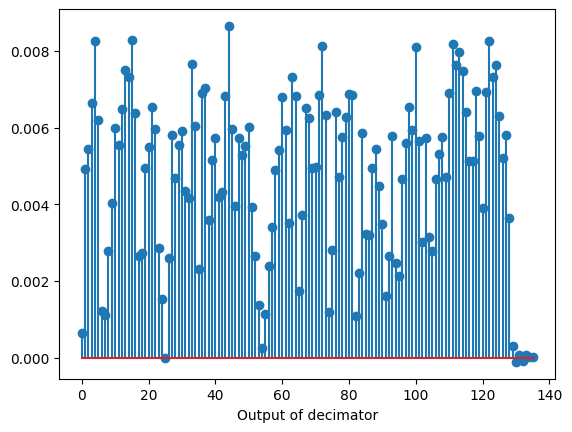

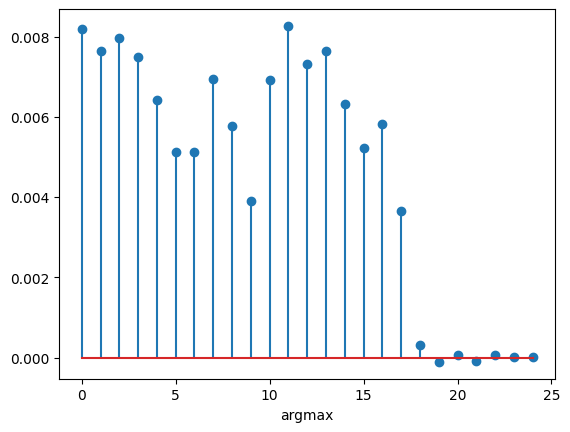

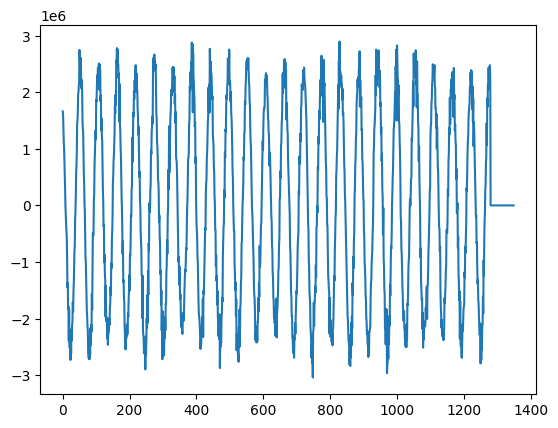

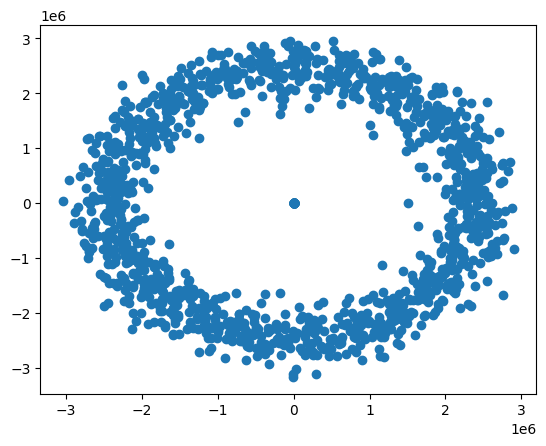

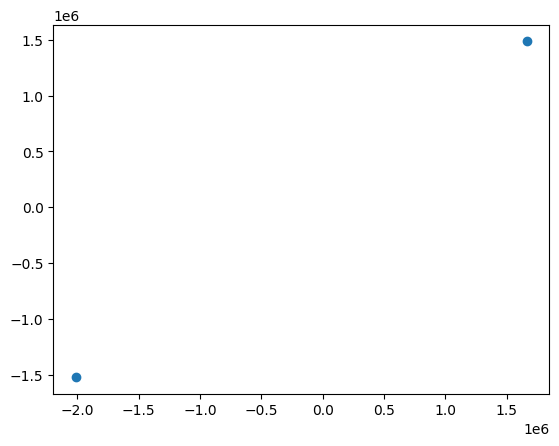

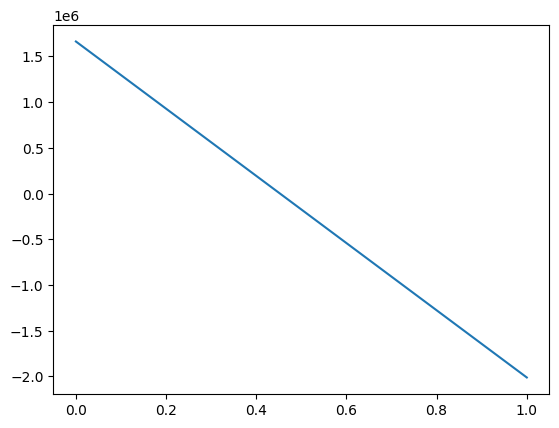

In [19]:
rx_data = np.load('data.pcm.npy')
print("rx_data length(): ", len(rx_data))

print("raw sdr.rx() data plotted ")
plt.figure(1)
plt.scatter(rx_data.real,rx_data.imag)
# plt.figure(3)
# plt.plot(rx_data)
ns = 10
b = np.ones(int(ns))


index_rx = 40664 + 70
frame_size = 1350
frame_rx = rx_data[index_rx:index_rx + frame_size]
# plt.figure(4)
# plt.plot(frame_rx)
fs = 1e6
rs = 100000
# plt.figure(5)
# plt.plot(time_synced_rx)
xrec = frame_rx/np.mean(frame_rx**4)
fsr=4*rs/fs
xrec_a= np.abs(np.real(xrec) )
b2,a2 = signal.butter(10,fsr,btype='lowpass')
y1f = signal.lfilter(b2,a2,xrec_a)
yf=np.convolve(xrec_a ,b)
plt.figure(2)
plt.plot(np.abs(yf))
plt.xlabel('Output of matched filter')

y1f = signal.lfilter(b2,a2,yf)
y12=signal.decimate(yf,ns)
y=np.correlate(y12,b )

plt.figure(3)
plt.stem(y12)
plt.xlabel('Output of decimator')
ind = np.argmax(abs(y),axis=0)
yd=y12[ind+1:ind+135]
plt.figure(4)
plt.stem(yd)
plt.xlabel('argmax')

coarseed_rx = coarse_freq_sync(frame_rx)
plt.figure(5)
plt.plot(coarseed_rx)
plt.figure(7)
plt.scatter(coarseed_rx.real,coarseed_rx.imag)

time_synced_rx = time_sync(coarseed_rx)

fine_freq_rx = fine_freq_sync(time_synced_rx)
print(len(fine_freq_rx))
plt.figure(8)
plt.scatter(fine_freq_rx.real,fine_freq_rx.imag)
plt.figure(9)
plt.plot(fine_freq_rx)